In [76]:
import pandas as pd
import hvplot.pandas
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
%matplotlib inline

In [77]:
movie_gender_genre_df = pd.read_csv('Data/Movie-Gender-Genre-Table.csv', low_memory=False)

In [78]:
movie_gender_genre_df= movie_gender_genre_df.drop(['Unnamed: 0','Unnamed: 0.1'], axis=1)

In [79]:
genre_list = list(movie_gender_genre_df.columns[26:44])
print(genre_list)

['Action', 'Adventure', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction', 'TV Movie', 'Thriller', 'War', 'Western']


In [80]:
def change_dtype_cat(movie_gender_genre_df):
    gender_list = ['actor1_gender','actor2_gender','actor3_gender','actor4_gender','actor5_gender','director_gender']
    movie_gender_genre_df[gender_list] = movie_gender_genre_df[gender_list].astype(str).replace('1','F').replace('2','M').astype('category')
    
    return movie_gender_genre_df[gender_list].dtypes

In [81]:
change_dtype_cat(movie_gender_genre_df)

actor1_gender      category
actor2_gender      category
actor3_gender      category
actor4_gender      category
actor5_gender      category
director_gender    category
dtype: object

### New Column: Genre1
Seperating the main genre tag from the additional ones

In [82]:
movie_gender_genre_df['genre']

0                            Drama|Comedy
1                            Crime|Comedy
2                   Action|Thriller|Crime
3                                   Drama
4        Adventure|Action|Science Fiction
                       ...               
61595                       Drama|History
61596                              Comedy
61597                              Comedy
61598                             Western
61599                               Drama
Name: genre, Length: 61600, dtype: object

In [83]:
#new data frame with split value columns
genre_split = movie_gender_genre_df["genre"].str.split("|", n=10, expand = True)

#creating new column
genre_split["genre1"]= genre_split[0]

In [84]:
genre_split.shape

(61600, 12)

In [85]:
df_movies_genre = pd.concat([movie_gender_genre_df, genre_split['genre1']], axis=1)

In [86]:
movies_df = df_movies_genre.rename(columns={"year":"Year", "actor1_gender":"Gender"})

# Plotting results

### 1. Total Number of Male and Female Lead Actors

In [87]:
movies_df.groupby(['epoch','Gender'])[['Gender']].count()

Gender
epoch     Gender        
1900-1944 F         1542
          M         3842
1945-1969 F         2141
          M         7082
1970-1999 F         4872
          M        14117
2000-2017 F         8890
          M        19114

In [88]:
movies_df['Gender'].value_counts()

M    44155
F    17445
Name: Gender, dtype: int64

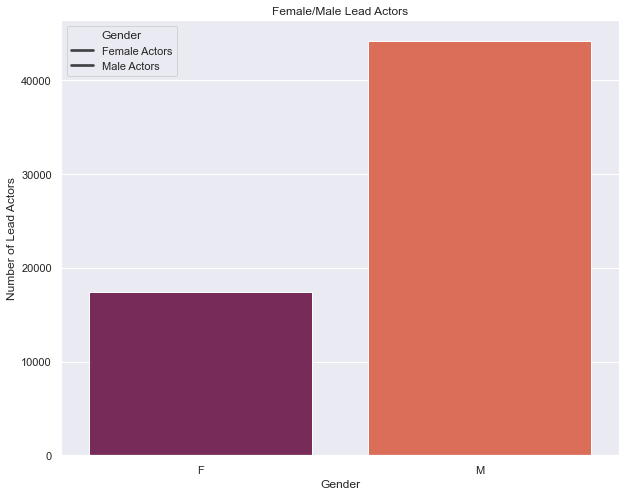

In [89]:
df_gender = (pd.DataFrame(movies_df['Gender']
              .value_counts()).reset_index().rename(columns={'index':'gender'})
)

fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(x='gender',
            y='Gender', 
            data=df_gender,
            palette='rocket',
            ax=ax
           ).set_title("Female/Male Lead Actors")

sns.set(font_scale = 1)
ax.set(xlabel='Gender', ylabel='Number of Lead Actors')
plt.legend(title='Gender', loc='upper left', labels=['Female Actors', 'Male Actors'])
plt.show()

### 2. Ratio Male/Female Actors per Genre

In [58]:
movies_df.groupby(by='Gender')[genre_list].sum()

,Action,Adventure,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
Gender,,,,,,,,,,,,,,,,,,
F,1233,756,5214,1275,442,9510,1057,759,355,1970,896,1043,3892,712,721,2838,258,174
M,8361,3693,14445,5003,2385,18266,2621,1711,1291,3543,2083,2222,5324,2643,891,7213,1431,2019


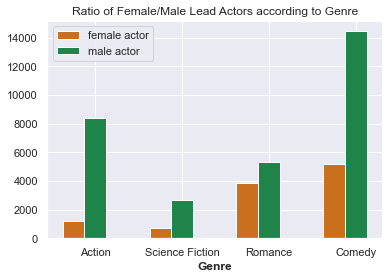

In [59]:
fig, ax = plt.subplots()
barWidth = 0.25

# set heights of bars
bars1 = [1233, 712, 3892, 5214] ### portion of female actors according to genre
bars2 = [8362, 2643, 5324, 14445] ### portion of male actors according to genre

# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
 
# bar styling and legend
plt.bar(r1, bars1, color='#ca6f1e', width=barWidth, edgecolor='white', label='female actor')
plt.bar(r2, bars2, color='#1e8449', width=barWidth, edgecolor='white', label='male actor')
 
# Add xticks on the middle of the group bars
ax.set_title('Ratio of Female/Male Lead Actors according to Genre')
plt.xlabel('Genre', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(bars1))], ['Action', 'Science Fiction', 'Romance', 'Comedy'])
 
plt.legend()
plt.show()

In [60]:
plt.show()

### 3. Development over Time (over the years, development epochs)

In [61]:
movies_df.drop(movies_df[movies_df.Year > 2017].index, inplace=True)

In [62]:
yearly_lines_action = pd.pivot_table(movies_df, 
                              columns='Gender',
                              index='Year', 
                              aggfunc='sum',
                              values='Action')

In [63]:
yearly_lines_scifi = pd.pivot_table(movies_df, 
                              columns='Gender',
                              index='Year', 
                              aggfunc='sum',
                              values='Science Fiction')

In [64]:
yearly_lines_romance = pd.pivot_table(movies_df, 
                              columns='Gender',
                              index='Year', 
                              aggfunc='sum',
                              values='Romance')

In [65]:
yearly_lines_comedy = pd.pivot_table(movies_df, 
                              columns='Gender',
                              index='Year', 
                              aggfunc='sum',
                              values='Comedy')

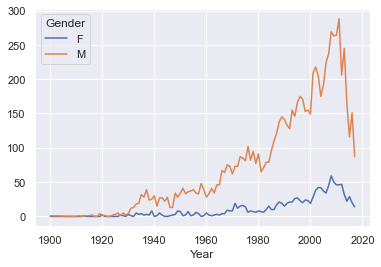

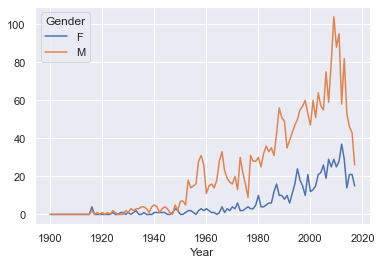

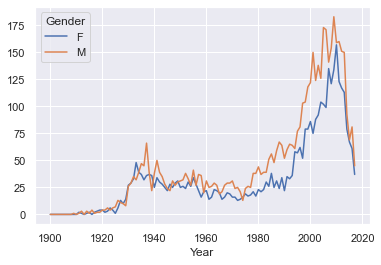

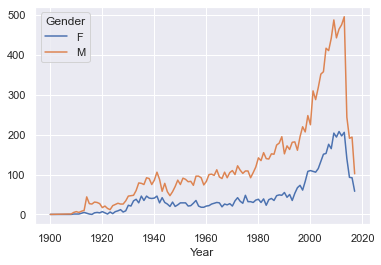

In [66]:
yearly_lines_action.plot(use_index=True)
yearly_lines_scifi.plot(use_index=True)
yearly_lines_romance.plot(use_index=True)
yearly_lines_comedy.plot(use_index=True)

leg = ax.legend(loc='upper left');

In [67]:
epoch_df = pd.DataFrame(movies_df.groupby(
    ['epoch','Gender'])[['Gender']]
                        .count()
                        .rename(columns={'Gender':'Number of Male/Female Actors','epoch':'Film Epoch'})
                        .sort_values(by=['epoch'], ascending=True)
                       )
                        
epoch_df

Number of Male/Female Actors
epoch     Gender                              
1900-1944 F                               1542
          M                               3842
1945-1969 F                               2141
          M                               7082
1970-1999 F                               4872
          M                              14117
2000-2017 F                               8890
          M                              19114

In [68]:
epoch_df.hvplot.bar(
    stacked=True,color=["maroon","teal"],
    line_width=1.5,
    line_color="black",height=350,width=500)

:Bars   [epoch,Gender]   (Number of Male/Female Actors)

### 4. Popularity of Movies feat. Male/Female Lead Actors

In [ ]:
### discarded because there is no clean/clear data!

In [238]:
movies_df['popularity'] = movies_df['popularity'].str.replace(',','.').replace('E-','').astype(float).round(2)

In [248]:
movies_new = movies_df.rename(columns={"popularity":"Popularity"})

In [254]:
popularity_df = pd.DataFrame(
    movies_new
    .groupby('Gender')
    .Popularity
    .agg('median')
    .rename({'median':'Popularity'})
                       )
popularity_df

,Popularity
Gender,
F,0.12
M,0.10


In [256]:
popularity_df.hvplot.bar(
    stacked=True, color=["orange","green"],
    line_width=1.5,
    line_color="black",height=350,width=500)

:Bars   [Gender]   (Popularity)

### 5. Word Frequency in Summaries of Movies Starring Male/Female Actors

(-0.5, 399.5, 199.5, -0.5)

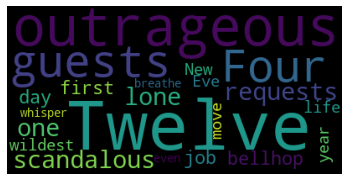

In [69]:
df_movies_genre = pd.read_csv('Data/Movie-Gender-Genre-Table.csv')
tagline = df_movies_genre['tagline'].values 
wordcloud = WordCloud().generate(str(tagline))

plt.imshow(wordcloud)
plt.axis("off")

In [70]:
plt.show()

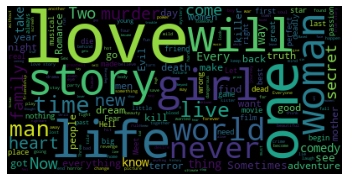

In [71]:
f_words = ' '.join([Text for Text in df_movies_genre[df_movies_genre['actor1_gender']=='F']['tagline']])
wordcloud = WordCloud().generate(str(f_words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

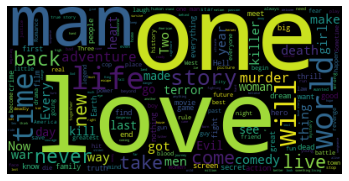

In [72]:
m_words = ' '.join([Text for Text in df_movies_genre[df_movies_genre['actor1_gender']=='M']['tagline']])
wordcloud = WordCloud().generate(str(m_words))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

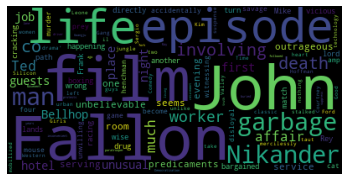

In [73]:
df_movies_genre = pd.read_csv('Data/Movie-Gender-Genre-Table.csv')
summary = df_movies_genre['summary'].values 
wordcloud = WordCloud().generate(str(summary))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

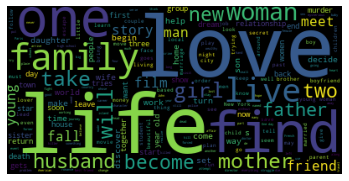

In [74]:
f_words_summary = ' '.join([Text for Text in df_movies_genre[df_movies_genre['actor1_gender']=='F']['summary']])
wordcloud = WordCloud().generate(str(f_words_summary))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

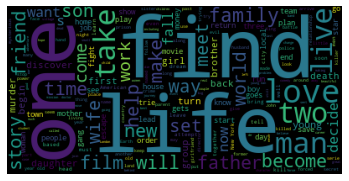

In [75]:
m_words_summary = ' '.join([Text for Text in df_movies_genre[df_movies_genre['actor1_gender']=='M']['summary']])
wordcloud = WordCloud().generate(str(m_words_summary))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()